In [3]:
import pandas as pd

df = pd.read_csv("/Users/hsufangyu/Desktop/SNU/ML Term Project/Project 2/SeoulBikeData.csv", encoding='latin1')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


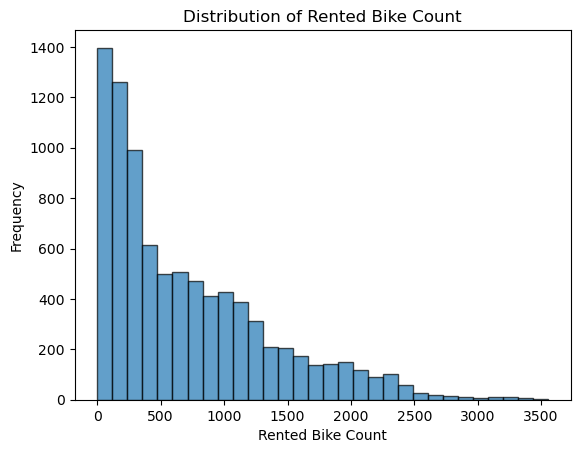

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Demand,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,1,1,1


In [4]:
import matplotlib.pyplot as plt

plt.hist(df['Rented Bike Count'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.title('Distribution of Rented Bike Count')
plt.show()

percentile_75 = df['Rented Bike Count'].quantile(0.75)
df['Demand'] = df['Rented Bike Count'].apply(lambda x: 1 if x > percentile_75 else 0)

df = df.drop('Date', axis=1)

categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

df.head()

In [5]:
from sklearn.model_selection import train_test_split
import numpy as np

def calculate_cov(dataframe):
    return dataframe.std() / dataframe.mean()

features = df.drop(['Rented Bike Count', 'Demand'], axis=1)
target = df['Demand']

X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.4, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

train_stats = X_train.describe().T
cv_stats = X_cv.describe().T
test_stats = X_test.describe().T
df_stats = df.describe().T

train_cov = calculate_cov(X_train)
cv_cov = calculate_cov(X_cv)
test_cov = calculate_cov(X_test)
df_cov = calculate_cov(df.drop(['Rented Bike Count', 'Demand'], axis=1))

train_corr = X_train.corr()
cv_corr = X_cv.corr()
test_corr = X_test.corr()
df_corr = df.drop(['Rented Bike Count', 'Demand'], axis=1).corr()

print("Training set statistics:\n", train_stats)
print("\nCross-validation set statistics:\n", cv_stats)
print("\nTest set statistics:\n", test_stats)
print("\nEntire set statistics:\n", df_stats)

print("Training set COV:\n", train_cov)
print("\nCross-validation set COV:\n", cv_cov)
print("\nTest set COV:\n", test_cov)
print("\nEntire set COV:\n", df_cov)

print("\nTraining set Correlation Coefficients:\n", train_corr)
print("\nCross-validation set Correlation Coefficients:\n", cv_corr)
print("\nTest set Correlation Coefficients:\n", test_corr)
print("\nEntire set Correlation Coefficients:\n", df_corr)

Training set statistics:
                             count         mean         std   min      25%  \
Hour                       5256.0    11.522260    6.865257   0.0    6.000   
Temperature(°C)            5256.0    12.939193   11.902740 -17.5    3.675   
Humidity(%)                5256.0    58.051750   20.409313   0.0   42.000   
Wind speed (m/s)           5256.0     1.735864    1.037008   0.0    1.000   
Visibility (10m)           5256.0  1438.497146  611.550354  33.0  940.750   
Dew point temperature(°C)  5256.0     4.074182   12.933099 -30.6   -4.400   
Solar Radiation (MJ/m2)    5256.0     0.587327    0.881983   0.0    0.000   
Rainfall(mm)               5256.0     0.145186    1.034790   0.0    0.000   
Snowfall (cm)              5256.0     0.072374    0.442347   0.0    0.000   
Seasons_Spring             5256.0     0.256849    0.436937   0.0    0.000   
Seasons_Summer             5256.0     0.245624    0.430498   0.0    0.000   
Seasons_Winter             5256.0     0.241058    

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_cv_scaled = scaler.transform(X_cv)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_cv_pred_scaled = log_reg.predict(X_cv_scaled)

accuracy_scaled = accuracy_score(y_cv, y_cv_pred_scaled)
precision_scaled = precision_score(y_cv, y_cv_pred_scaled, average='weighted')
recall_scaled = recall_score(y_cv, y_cv_pred_scaled, average='weighted')
f1_scaled = f1_score(y_cv, y_cv_pred_scaled, average='weighted')

print(f"Accuracy with Standardized Features: {accuracy_scaled}")
print(f"Precision with Standardized Features: {precision_scaled}")
print(f"Recall with Standardized Features: {recall_scaled}")
print(f"F1-Score with Standardized Features: {f1_scaled}")

Accuracy with Standardized Features: 0.8527397260273972
Precision with Standardized Features: 0.8498858615181464
Recall with Standardized Features: 0.8527397260273972
F1-Score with Standardized Features: 0.8510463749576349


In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_cv_poly = poly.transform(X_cv_scaled)

log_reg_poly = LogisticRegression(max_iter=1000)
log_reg_poly.fit(X_train_poly, y_train)
y_cv_pred_poly = log_reg_poly.predict(X_cv_poly)

accuracy_poly = accuracy_score(y_cv, y_cv_pred_poly)
precision_poly = precision_score(y_cv, y_cv_pred_poly, average='weighted')
recall_poly = recall_score(y_cv, y_cv_pred_poly, average='weighted')
f1_poly = f1_score(y_cv, y_cv_pred_poly, average='weighted')

print(f"Accuracy with Polynomial Features: {accuracy_poly}")
print(f"Precision with Polynomial Features: {precision_poly}")
print(f"Recall with Polynomial Features: {recall_poly}")
print(f"F1-Score with Polynomial Features: {f1_poly}")

Accuracy with Polynomial Features: 0.9006849315068494
Precision with Polynomial Features: 0.8994864015255718
Recall with Polynomial Features: 0.9006849315068494
F1-Score with Polynomial Features: 0.8999646694953001


/Users/hsufangyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
log_reg_l1.fit(X_train_poly, y_train)
y_cv_pred_l1 = log_reg_l1.predict(X_cv_poly)

log_reg_l2 = LogisticRegression(penalty='l2', max_iter=1000)
log_reg_l2.fit(X_train_poly, y_train)
y_cv_pred_l2 = log_reg_l2.predict(X_cv_poly)

metrics = {
    'L1': (y_cv_pred_l1, 'L1 Regularization'),
    'L2': (y_cv_pred_l2, 'L2 Regularization')
}

for key, (pred, name) in metrics.items():
    accuracy = accuracy_score(y_cv, pred)
    precision = precision_score(y_cv, pred, average='weighted')
    recall = recall_score(y_cv, pred, average='weighted')
    f1 = f1_score(y_cv, pred, average='weighted')
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")


L1 Regularization:
Accuracy: 0.9046803652968036
Precision: 0.9030487929176243
Recall: 0.9046803652968036
F1-Score: 0.9035429615524774

L2 Regularization:
Accuracy: 0.9006849315068494
Precision: 0.8994864015255718
Recall: 0.9006849315068494
F1-Score: 0.8999646694953001


/Users/hsufangyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy - Mean: 0.8685, Std: 0.0099
Precision_weighted - Mean: 0.8683, Std: 0.0095
Recall_weighted - Mean: 0.8685, Std: 0.0099
F1_weighted - Mean: 0.8683, Std: 0.0097


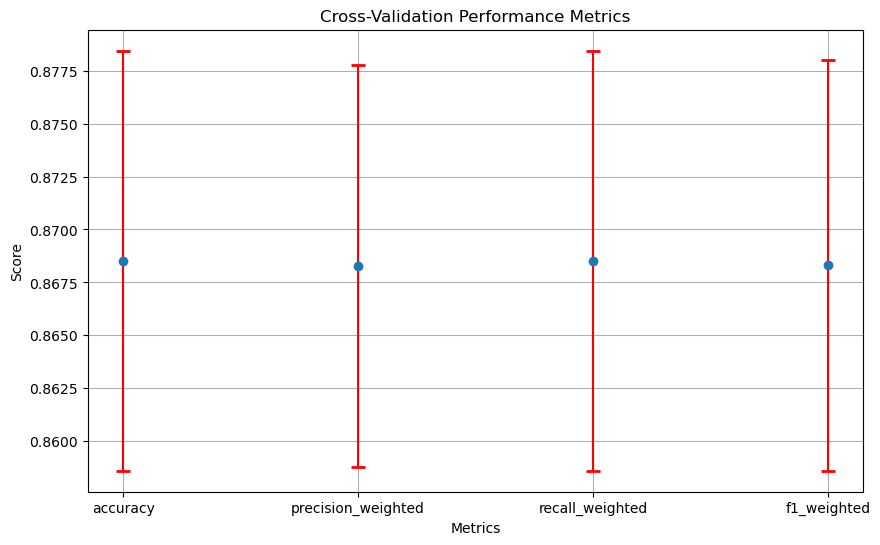

In [13]:
from sklearn.model_selection import cross_val_score

def evaluate_model(model, X, y):
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
    results = {}
    
    for metric in scoring:
        scores = cross_val_score(model, X, y, cv=5, scoring=metric)
        results[metric] = {
            'mean': scores.mean(),
            'std': scores.std()
        }
        
    return results

cv_results = evaluate_model(log_reg, X_train_scaled, y_train)

for metric, scores in cv_results.items():
    print(f"{metric.capitalize()} - Mean: {scores['mean']:.4f}, Std: {scores['std']:.4f}")
    
metrics = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
means = [cv_results[metric]['mean'] for metric in metrics]
stds = [cv_results[metric]['std'] for metric in metrics]

plt.figure(figsize=(10, 6))
plt.errorbar(metrics, means, yerr=stds, fmt='o', capsize=5, capthick=2, ecolor='red')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Cross-Validation Performance Metrics')
plt.grid(True)
plt.show()

Without Feature Scaling:
Accuracy - Mean: 0.8661, Std: 0.0092
Precision_weighted - Mean: 0.8660, Std: 0.0087
Recall_weighted - Mean: 0.8661, Std: 0.0092
F1_weighted - Mean: 0.8660, Std: 0.0090

With Feature Scaling (Standardization):
Accuracy - Mean: 0.8685, Std: 0.0099
Precision_weighted - Mean: 0.8683, Std: 0.0095
Recall_weighted - Mean: 0.8685, Std: 0.0099
F1_weighted - Mean: 0.8683, Std: 0.0097


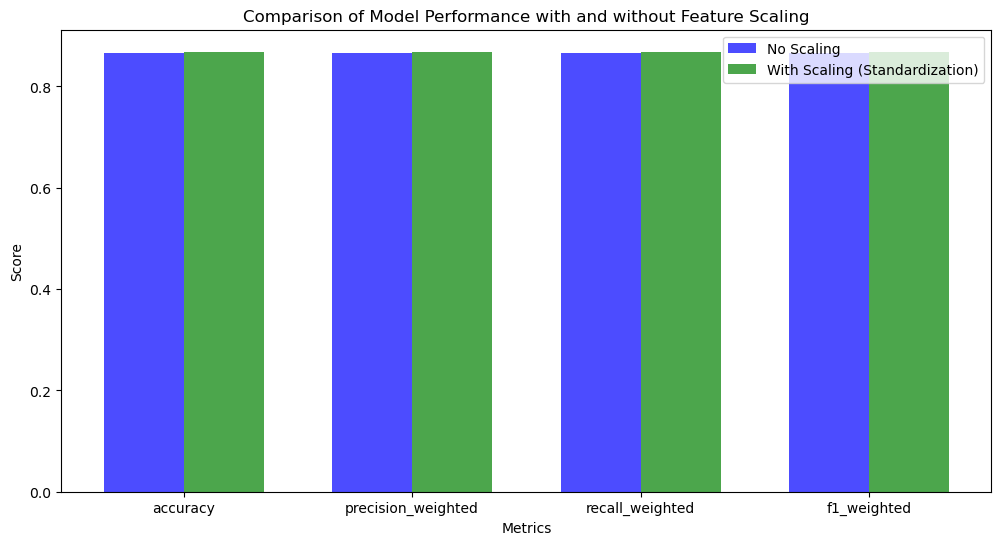

In [14]:
log_reg_no_scaling = LogisticRegression(max_iter=5000)
log_reg_no_scaling.fit(X_train, y_train)
cv_results_no_scaling = evaluate_model(log_reg_no_scaling, X_train, y_train)

print("Without Feature Scaling:")
for metric, scores in cv_results_no_scaling.items():
    print(f"{metric.capitalize()} - Mean: {scores['mean']:.4f}, Std: {scores['std']:.4f}")

print("\nWith Feature Scaling (Standardization):")
for metric, scores in cv_results.items():
    print(f"{metric.capitalize()} - Mean: {scores['mean']:.4f}, Std: {scores['std']:.4f}")

metrics = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
means_no_scaling = [cv_results_no_scaling[metric]['mean'] for metric in metrics]
means_scaling = [cv_results[metric]['mean'] for metric in metrics]

x = range(len(metrics))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x, means_no_scaling, width, label='No Scaling', color='blue', alpha=0.7)
plt.bar([p + width for p in x], means_scaling, width, label='With Scaling (Standardization)', color='green', alpha=0.7)

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparison of Model Performance with and without Feature Scaling')
plt.xticks([p + width / 2 for p in x], metrics)
plt.legend()
plt.show()